## Esame di Metodi Numerici

21 Luglio 2023

# Esercizio 1
Nel file ``testI.mat`` sono memorizzati la matrice A ed il vettore b. 

 - Verificare che per risolvere il sistema Ax=b sia possibile utilizzare i due metodi di discesa visti a lezione, **Punti 1**
 - implementare entrambi gli algoritmi e dire quante iterazioni sono necessarie per ciascuno di essi  per calcolare la soluzione con una toll=1e-6 e maxit=2000. Visualizzare in un grafico l'errore in scala logaritmica ad ogni iterazione per ciascuno dei due metodi. **Punti 6**
 - Verificare se la matrice è  malcondizionata, dire teoricamente cosa questo implica in termini della velocità di convergenza  dei due metodi alla soluzione, richiamando il risultato teorico visto a lezione.**Punti 2**

 - Costruire la matrice A1, ottenuta a partire da A, sommandole uma matrice diagonale con elementi sulla diagonali tutti uguali a 0.05, e termine noto b1, costruito in maniera tale che la soluzione del sistema A1 x1 =b1 sia il vettore formato da tutti 1. Risolvere il sistema lineare con matrice dei coefficienti A1 e termine noto b1, sia con il metodo del gradiente che con il metodo del gradiente coniugato. Osservare il numero di iterazioni eseguito da ciascun metodo e giustificare i risultati **Punti 2**
  
  **Totale: Punti 11**
   
   
Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('testI.mat')``

``A=dati["A"] ``

``A=A.astype(float)``

`` b=dati["b"] ``

`` b=b.astype(float)``


In [8]:
from scipy.io import loadmat

import numpy as np

dati = loadmat('testI.mat')

A=dati["A"] 

A=A.astype(float)

b=dati["b"] 

b=b.astype(float)

In [9]:
print(A.shape)
nonZeros = np.count_nonzero(A)
perc = nonZeros/(A.shape[0]*A.shape[1]) * 100
print(perc,"%")
if perc <= 33:
    print("matrice sparsa")
if np.all(A.T==A):
    print("simmetrica")
    val,vec = np.linalg.eig(A)
    flag = val>0
    if np.all(flag):
        print("definita positiva")

(300, 300)
9.524444444444445 %
matrice sparsa
simmetrica
definita positiva


In [10]:
def steepestdescent(A,b,x0,itmax,tol):
 
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
    
   # inizializzare le variabili necessarie
    x = x0

     
    r = A@x-b
    p =  -r
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x)
    vet_r=[]
    vet_r.append(errore)
     
# utilizzare il metodo del gradiente per trovare la soluzione
    while it<=itmax and errore >= tol:
        it=it+1
        Ap= A@p
       
        alpha = -(r.T@p)/(p.T@Ap)
                
        x = x+alpha*p
        
         
        vec_sol.append(x)
        r=r+alpha*Ap
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p =-r
        
     
    return x,vet_r,vec_sol,it
def conjugate_gradient(A,b,x0,itmax,tol):
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
    
   # inizializzare le variabili necessarie
    x = x0
    
    r = A@x-b
    p = -r
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x0)
    vet_r=[]
    vet_r.append(errore)
# utilizzare il metodo del gradiente coniugato per calcolare la soluzione
    while errore >= tol and it< itmax:
        it=it+1
        Ap=A@p
        alpha = -(r.T@p)/(p.T@Ap)
        x =x+alpha*p
        vec_sol.append(x)
        rtr_old=r.T@r
        r=r+alpha*Ap
        gamma= (r.T@r)/rtr_old
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p =  -r+gamma*p
   
    
    return x,vet_r,vec_sol,it

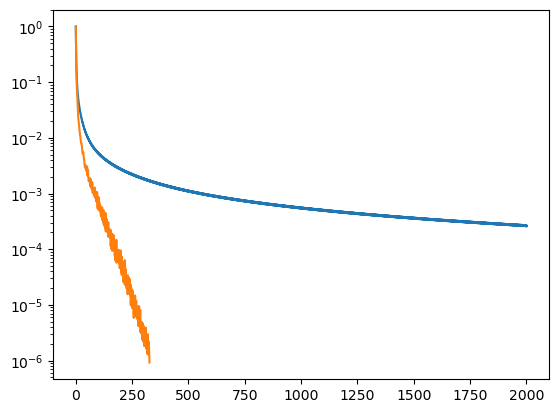

iterazioni necessarie per Steepest Gradient =>  2001
iterazioni necessarie per Conjugate Gradient =>  327


In [19]:
itMax = 2000
tol = 1e-6
x0 = np.zeros((A.shape[0],1))

xS,errS,solS,itS = steepestdescent(A,b,x0,itMax,tol)
xC,errC,solC,itC = conjugate_gradient(A,b,x0,itMax,tol)

import matplotlib.pyplot as plt
plt.semilogy(range(itS+1),errS,range(itC+1),errC)
plt.show()
print("iterazioni necessarie per Steepest Gradient => ",itS)
print("iterazioni necessarie per Conjugate Gradient => ",itC)

In [21]:
print("{:e}".format(np.linalg.cond(A)))
print("matrice mal condizionata")

1.000000e+04
matrice mal condizionata


La matrice A è malcondizionata, il che implica una elevata propagazione dell'errore nella soluzione, entrando nello specifico lo steepest Gradient non converge il che è proprio dato dal malcondizionamento della matrice e dall'elevata diversità degli autovalori della matrice, dato che SteepestDescent segue l'andamento dell'autovalore maggiore.
Mentre ConjugateGradient è generalmente più robusto e quindi nel nostro caso riesce a convergere, questo avviene perchè il metodo del gradiente coniugato utilizza il gradiente dell'iterazione precedente per evitare oscillazioni impreviste e convergere più velocemente

2.095808e+01


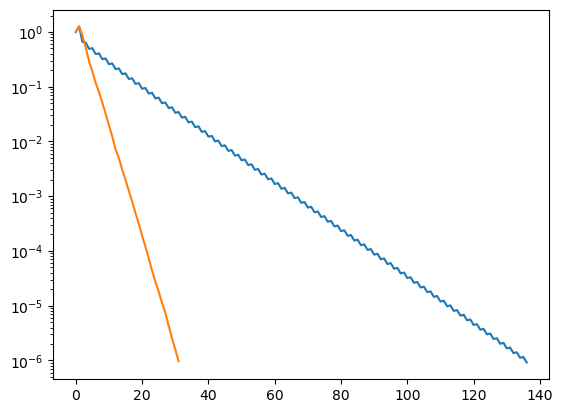

iterazioni necessarie per Steepest Gradient =>  136
iterazioni necessarie per Conjugate Gradient =>  31


In [28]:
A1 = A.copy()
n = A1.shape[0]
for i in range(n):
    A1[i][i] += 0.05
b1 = np.ones((n,1))

print("{:e}".format(np.linalg.cond(A1)))

xS,errS,solS,itS = steepestdescent(A1,b1,x0,itMax,tol)
xC,errC,solC,itC = conjugate_gradient(A1,b1,x0,itMax,tol)

import matplotlib.pyplot as plt
plt.semilogy(range(itS+1),errS,range(itC+1),errC)
plt.show()
print("iterazioni necessarie per Steepest Gradient => ",itS)
print("iterazioni necessarie per Conjugate Gradient => ",itC)

Possiamo vedere che con una matrice di termini noti ben condizionata entrambi i metodi convergono alla soluzione molto rapidamente, e comunque il gradiente coniugato rimane più rapido.

# Esercizio 2

Siano assegnati i punti del piano di coordinate $(x_i, y_i)$, $i=1,\ldots,4$ con 
$$
\begin{array}{c}
x_1=0, \quad x_2=5, \quad x_3=0, \quad x_4=6\\
y_1=0, \quad y_2=0, \quad y_3=5, \quad y_4=7.
\end{array}
$$ 
contenenti rispettivamente le ascisse e le ordinate di 11 punti del piano.

 - si costruisca il sistema lineare sovradeterminato ottenuto imponendo il passaggio della circonferenza di equazione $x^2+y^2+a_1x+a_2y+a_3=0$ per i quattro punti assegnati, e si denotino con ${\bf A}$ e ${\bf b}$ la matrice dei coefficienti e il termine noto ottenuti;  **5 punti**

- si sfrutti il metodo  più opportuno per ottenere la soluzione ${\bf a}^*$ del problema ai minimi quadrati $\min_{{\bf a} \in \mathbb{R}^3} \|{\bf A}{\bf a}-{\bf b}\|_2^2$;  **5 punti**

- si calcoli il valore di $\|{\bf A}{\bf a}^*-{\bf b}\|_2^2$ e, dopo averne determinato centro e raggio, si rappresentino in una stessa figura la circonferenza di equazione $x^2+y^2+a^*_1x+a^*_2y+a^*_3=0$ (individuata dalla soluzione ${\bf a}^*$ del problema ai minimi quadrati) e i quattro punti assegnati dal problema. **4 punti**


  **Totale: Punti 14**
**Suggerimento:**
Si ricorda che data una circonferenza nella forma canonica
$$ x^2+y^2+a_1 x+a_2 x+a_3=0$$

le coordinate del suo centro sono 
$$C≡(-a_1/2,-a_2/2)$$

e la lunghezza del suo raggio è data da:

$$r=\sqrt{\frac{a_1^2}{4}+\frac{a_2^2}{4} -a_3}$$

e la circoferenza può essere rappresentata in forma parametrica $C(t),  t \in [0, 2 \cdot \pi]$ e le due componenti parametriche sono $$x(t)= C_0+r\cdot cos(t);$$ $$ y(t)= C_1+r\cdot sin(t)$$


[[0 0 1]
 [5 0 1]
 [0 5 1]
 [6 7 1]]
[[  0]
 [-25]
 [-25]
 [-85]]
[[-6.6091954 ]
 [-6.72413793]
 [ 4.59770115]]
57.47126436781611
[4.19835355]
(array([3.3045977]), array([3.36206897]))


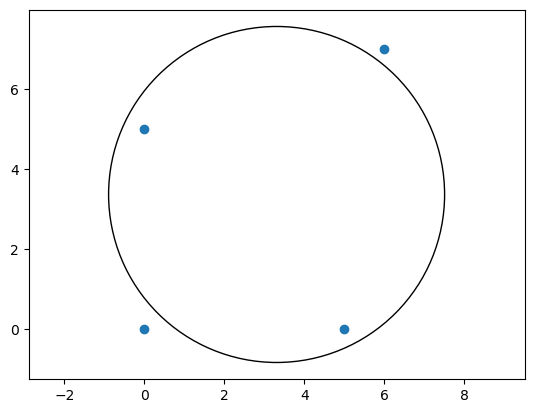

In [47]:
import scipy.linalg as spLin
import RisolviSis as solver
import matplotlib.pyplot as plt
import matplotlib.patches as patches

x = np.array([0,5,0,6])
y = np.array([0,0,5,7])

A = np.array([[x[0],y[0],1],[x[1],y[1],1],[x[2],y[2],1],[x[3],y[3],1]])
b = np.array([[-x[0]**2-y[0]**2],[-x[1]**2-y[1]**2],[-x[2]**2-y[2]**2],[-x[3]**2-y[3]**2]])

def qrLS(A,b):
    #Risolve un sistema sovradeterminato con il metodo QR-LS
    n=A.shape[1]  # numero di colonne di A
    Q,R=spLin.qr(A)
    h=Q.T@b
    x,flag=solver.Usolve(R[0:n,:],h[0:n])
    residuo=np.linalg.norm(h[n:])**2
    return x,residuo

x1,res = qrLS(A,b)
print(A)
print(b)
print(x1)
print(res)

r = np.sqrt(x1[0]**2/4 + x1[1]**2/4 - x1[2])
C = (-x1[0]/2 , -x1[1]/2)
print(r)
print(C)

fig, ax = plt.subplots()

# Crea una circonferenza con centro (h, k) e raggio r
circonferenza_sol = patches.Circle(C, r, fill=False)
ax.add_patch(circonferenza_sol)
ax.scatter(x,y)
ax.axis("equal")
plt.show()

[[0 0 1]
 [5 0 1]
 [0 5 1]
 [6 7 1]]
[[  0]
 [-25]
 [-25]
 [-85]]
[[-6.6091954 ]
 [-6.72413793]
 [ 4.59770115]]
57.47126436781611
raggio =>  [4.19835355]
centro =>  (array([3.3045977]), array([3.36206897]))


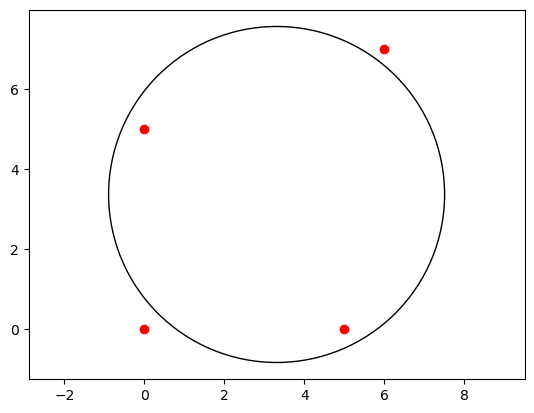

In [46]:
####### FILE NON DATO ALL'ESEAME ########



import numpy as np
import scipy.linalg as spl
import RisolviSis
import matplotlib.pyplot as plt
import matplotlib.patches as patches

x1,y1 = 0,0
x2,y2 = 5,0
x3,y3 = 0,5
x4, y4 = 6,7

A = np.array([[x1,y1,1],[x2,y2,1],[x3,y3,1],[x4,y4,1]])
b = np.array([[-x1**2-y1**2],[-x2**2-y2**2],[-x3**2-y3**2],[-x4**2-y4**2]])

print(A)
print(b)

#Soluzione di un sistema sovradeterminato facendo uso della fattorizzazione QR    
def qrLS(A,b):
    n=A.shape[1]  # numero di colonne di A
    Q,R=spl.qr(A)
    h=Q.T@b
    x,flag=RisolviSis.Usolve(R[0:n,:],h[0:n])
    residuo=np.linalg.norm(h[n:])**2
    return x,residuo

x,res = qrLS(A,b)
print(x)
print(res)

r = np.sqrt(x[0]**2/4 + x[1]**2/4 - x[2])
print("raggio => ",r)
fig, ax = plt.subplots()

# Crea una circonferenza con centro (h, k) e raggio r
circonferenza_sol = patches.Circle((-x[0]/2, -x[1]/2), r, fill=False)
print("centro => ",(-x[0]/2, -x[1]/2))
# Aggiungi la circonferenza al grafico
ax.add_patch(circonferenza_sol)
ax.scatter([x1, x2, x3, x4], [y1, y2, y3, y4], color='red')


# Imposta gli assi per avere la stessa scala
ax.axis('equal')

# Mostra il grafico
plt.show()


## Domanda intelligenza artificiale

- Allenamento di una rete neurale: dopo aver descritto come è composta una rete neurale, descrivi in cosa consiste la fase di forward propagation e la fase di backward propagation. **Punti: 1**
- Ottimizzazione della loss function per il training di una rete neurale per il task di regressione: Metodo di discesa del gradiente, metodo stocastico del gradiente, metodo del gradiente minibatch.  **Punti 1**  
 - Non convessità della loss-function - come non rimanere bloccati in un monimo locale? Metodo del gradiente con momentum. **Punti 2**
- Learning rate scheduling: step decay, decadimento esponenziale, decadimento dipendente dal tempo. **Punti 1**
 - Learning rate adattivo: Adagrad, RMSProp, Adadelta, Adam. **Punti 2**
 
 **Totale:  7**

una ANN(artificial neural network) è composta da diversi layer di neuroni artificiali collegati fra loro, abbiamo l'input layer,l'output layer e poi da 0 a n hidden layer chiamati così proprio perchè sono nascosti da un punto di vista esterno, dato che l'input lo passiamo all'input layer e l'output lo riceviamo da l'output layer.